In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import analysis_parameters as ap
import numpy as np
import dask
from dask.diagnostics import ProgressBar

In [10]:
model="NICAM"
var_name="rsut"

# Global tropical cloud ice


In [11]:
chunk_dict = {"time":3840//6, "lat":1706//3, "lon":1024}
var = xr.open_dataset("/scratch/b/b380883/dyamond2/"+model+"/"+var_name+"_ITCZ_NICAM-3km_20200120-20200228.nc", chunks=chunk_dict)[var_name]
# GEOS-6km_GT_20200120-20200229.nc
var

<xarray.DataArray 'rsut' (time: 3840, lat: 1137, lon: 10240)>
dask.array<open_dataset-73bdf81cabf83654d52183f047fab43drsut, shape=(3840, 1137, 10240), dtype=float32, chunksize=(640, 568, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 ... 2020-02-28T23:45:00
  * lon      (lon) float64 0.0176 0.0527 0.0879 0.123 ... 359.9 359.9 360.0
  * lat      (lat) float64 -29.97 -29.94 -29.9 -29.87 ... 9.896 9.932 9.967
Attributes:
    standard_name:  toa_outgoing_shortwave_flux
    long_name:      TOA upward short-wave radiation (OSR)
    units:          W m-2
    origin:         sa_swu_toa

In [12]:
bins = np.linspace(-5,1300,40) # np.linspace(-5,1300,40) # np.logspace(-7,1,40) # np.arange(80,310,5)


In [13]:
hist, edges = dask.array.histogram(var, bins=bins, range=[0,1300]) # range=[1e-7, 10], [70,320], [0,1300]

with ProgressBar():
    counts = hist.compute()


[########################################] | 100% Completed |  1hr 11min  2.3s


In [14]:
counts

array([22846524616,  1317302500,  8802957459,  1853028923,  1592756263,
        1521579285,  1006552636,   819164251,   682937053,   576210653,
         490539605,   425860906,   373099607,   329188898,   292342578,
         259346427,   229615548,   203052345,   179630582,   158950266,
         140676126,   124525346,   110021971,    96387996,    82869084,
          68742667,    53584048,    37578000,    22068415,     9337854,
           2137495,       89797,           0,           0,           0,
                 0,           0,           0,           0])

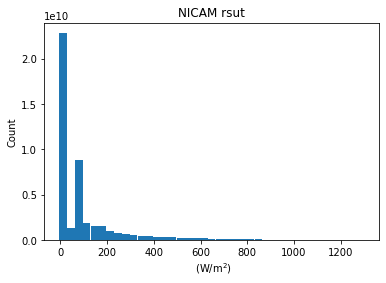

In [18]:
x = (edges[1:]+edges[:-1])/2 # np.linspace(-7,1)
plt.bar(x, counts, width=(bins[-1]-bins[0])/40) # np.array(np.logspace(-7,1,40))[:-1]
# plt.xscale("log")
# plt.xlim([80,310])
if var_name[0]=="r":
    plt.xlabel(" (W/m$^2$)")
elif var_name[:3]=="cli":
    plt.xlabel("IWP (kg/m$^2$)")
plt.ylabel("Count")
plt.title(model+" "+var_name)
plt.savefig("../plots/"+model+"_"+var_name+"_ITCZ.png")
plt.show()